# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the datetime module

#from datetime import datetime

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key +"&q=" + city + "&units=metric"
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_date = city_weather["dt"]
        
    

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kupang
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | socorro
Processing Record 5 of Set 1 | okhotsk
Processing Record 6 of Set 1 | pudozh
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | magadan
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | wangjing
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | tsiombe
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | meadow lake
Processing Record 20 of Set 1 | salinas
Processing Record 21 of Set 1 | pacocha
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | hadibu

Processing Record 35 of Set 4 | bereket
Processing Record 36 of Set 4 | nisporeni
Processing Record 37 of Set 4 | fortaleza
Processing Record 38 of Set 4 | isle of lewis
City not found. Skipping...
Processing Record 39 of Set 4 | ain oussera
Processing Record 40 of Set 4 | newman
Processing Record 41 of Set 4 | labrador city
Processing Record 42 of Set 4 | wau
Processing Record 43 of Set 4 | paradip garh
Processing Record 44 of Set 4 | ananindeua
Processing Record 45 of Set 4 | santiago de surco
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | champerico
Processing Record 48 of Set 4 | cooper's town
Processing Record 49 of Set 4 | aiquile
Processing Record 0 of Set 5 | uturoa
Processing Record 1 of Set 5 | iaciara
Processing Record 2 of Set 5 | guelmim
Processing Record 3 of Set 5 | west island
Processing Record 4 of Set 5 | ternate
Processing Record 5 of Set 5 | morehead city
Processing Record 6 of Set 5 | altamont
Processing Record 7 of Set 5 | ribnitz-damgarten


Processing Record 27 of Set 8 | lata
Processing Record 28 of Set 8 | pushkar
Processing Record 29 of Set 8 | ust'-kut
Processing Record 30 of Set 8 | lycksele
Processing Record 31 of Set 8 | los angeles
Processing Record 32 of Set 8 | oral
Processing Record 33 of Set 8 | ambodifotatra
Processing Record 34 of Set 8 | al burayqah
Processing Record 35 of Set 8 | kapenguria
Processing Record 36 of Set 8 | bay roberts
Processing Record 37 of Set 8 | usogorsk
Processing Record 38 of Set 8 | taoudenni
Processing Record 39 of Set 8 | rongelap
Processing Record 40 of Set 8 | vila velha
Processing Record 41 of Set 8 | pirae
Processing Record 42 of Set 8 | nuuk
Processing Record 43 of Set 8 | sodankyla
Processing Record 44 of Set 8 | altamira
Processing Record 45 of Set 8 | kyshtovka
Processing Record 46 of Set 8 | hithadhoo
Processing Record 47 of Set 8 | pisco
Processing Record 48 of Set 8 | taroa
Processing Record 49 of Set 8 | hazorasp
Processing Record 0 of Set 9 | luganville
Processing Reco

Processing Record 18 of Set 12 | tubmanburg
Processing Record 19 of Set 12 | saint-paul
Processing Record 20 of Set 12 | prainha
Processing Record 21 of Set 12 | acapulco de juarez
Processing Record 22 of Set 12 | cherdakly
Processing Record 23 of Set 12 | kapa'a
Processing Record 24 of Set 12 | sinop
Processing Record 25 of Set 12 | smach mean chey
City not found. Skipping...
Processing Record 26 of Set 12 | robertsport
Processing Record 27 of Set 12 | sao joao da barra
Processing Record 28 of Set 12 | riobamba
Processing Record 29 of Set 12 | marudi
City not found. Skipping...
Processing Record 30 of Set 12 | monona
Processing Record 31 of Set 12 | itoman
Processing Record 32 of Set 12 | ad douiem
Processing Record 33 of Set 12 | merizo village
Processing Record 34 of Set 12 | balikpapan
Processing Record 35 of Set 12 | minas de matahambre
City not found. Skipping...
Processing Record 36 of Set 12 | olinda
Processing Record 37 of Set 12 | amga
Processing Record 38 of Set 12 | kujang-

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kupang,-10.1667,123.5833,32.32,66,40,3.09,ID,1699841600
1,carnarvon,-24.8667,113.6333,23.19,66,27,4.52,AU,1699841600
2,albany,42.6001,-73.9662,-0.76,80,0,1.36,US,1699841439
3,socorro,31.6546,-106.3033,16.38,66,75,4.12,US,1699841600
4,okhotsk,59.3833,143.3000,-14.37,77,0,9.60,RU,1699841600


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kupang,-10.1667,123.5833,32.32,66,40,3.09,ID,1699841600
1,carnarvon,-24.8667,113.6333,23.19,66,27,4.52,AU,1699841600
2,albany,42.6001,-73.9662,-0.76,80,0,1.36,US,1699841439
3,socorro,31.6546,-106.3033,16.38,66,75,4.12,US,1699841600
4,okhotsk,59.3833,143.3000,-14.37,77,0,9.60,RU,1699841600


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

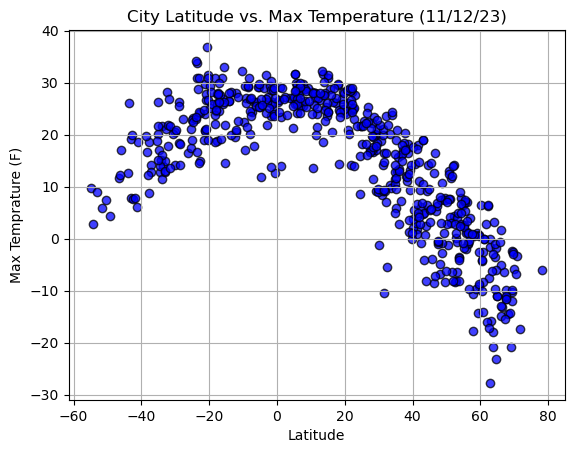

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker = "o", facecolor = "blue",
            edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

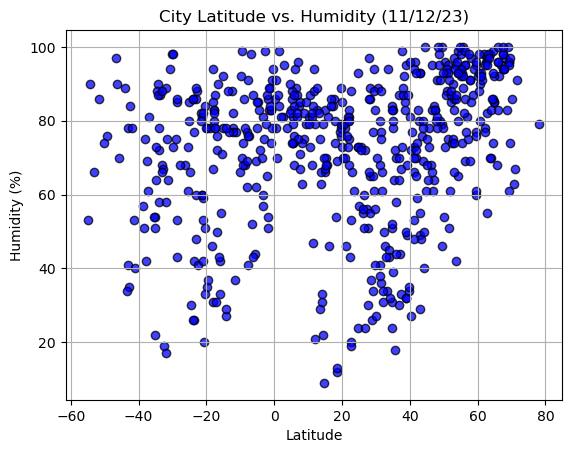

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker = "o", facecolor = "blue",
            edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

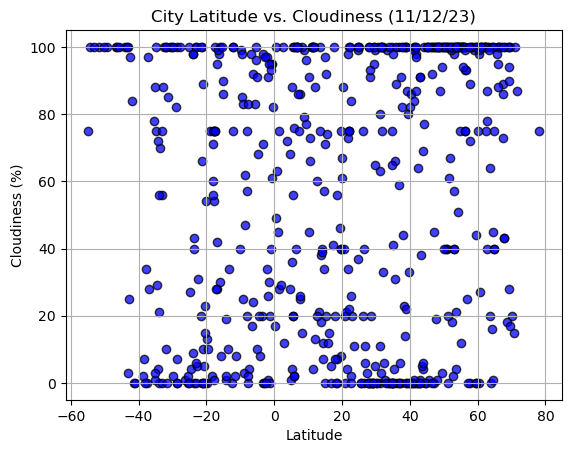

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", 
            edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

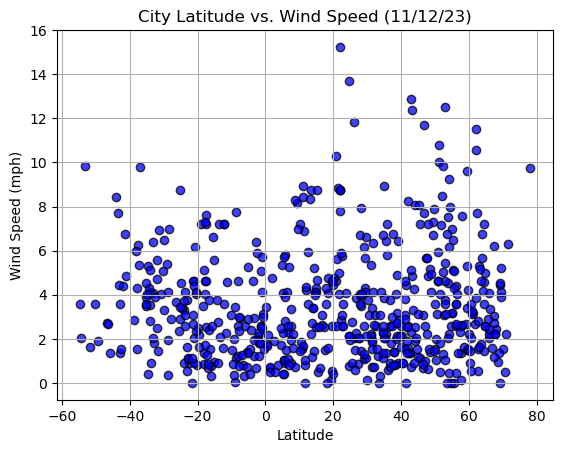

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", 
            edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values,y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='black')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f'The r-value is: {round(r_value**2,3)}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,-0.76,80,0,1.36,US,1699841439
3,socorro,31.6546,-106.3033,16.38,66,75,4.12,US,1699841600
4,okhotsk,59.3833,143.3000,-14.37,77,0,9.60,RU,1699841600
5,pudozh,61.8099,36.5345,2.75,98,100,2.68,RU,1699841601
6,wailua homesteads,22.0669,-159.3780,28.24,81,75,8.75,US,1699841601


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kupang,-10.1667,123.5833,32.32,66,40,3.09,ID,1699841600
1,carnarvon,-24.8667,113.6333,23.19,66,27,4.52,AU,1699841600
7,adamstown,-25.0660,-130.1015,22.80,85,100,8.73,PN,1699841345
12,ushuaia,-54.8000,-68.3000,9.81,53,75,3.60,AR,1699841603
14,namibe,-15.1961,12.1522,21.94,78,86,0.94,AO,1699841604


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.784


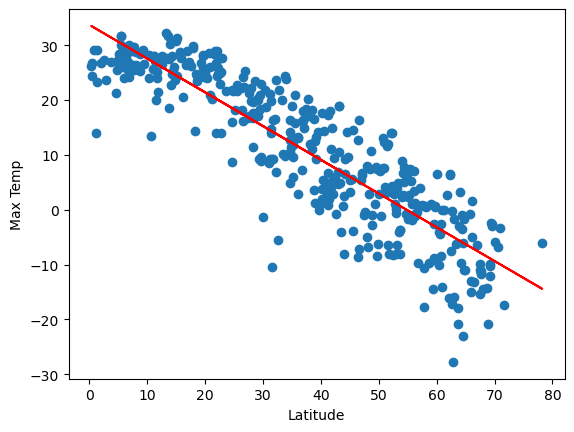

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression (x_values, y_values, y_label='Max Temp', text_coordinates=(25,40))
plt.show()

The r-value is: 0.408


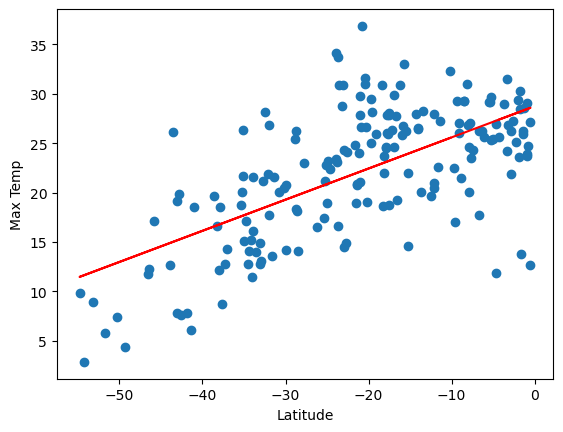

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression(x_values, y_values, y_label='Max Temp', text_coordinates=(50,40))
plt.show()

**Discussion about the linear relationship:** There is a negative correlation between maximum temperature and latitude in the Northern Hemisphere, indicating that as temperature increases, latitude decreases. Conversely, in the Southern Hemisphere, there is a positive correlation between maximum temperature and latitude, meaning that an increase in latitude is associated with an increase in maximum temperature.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.074


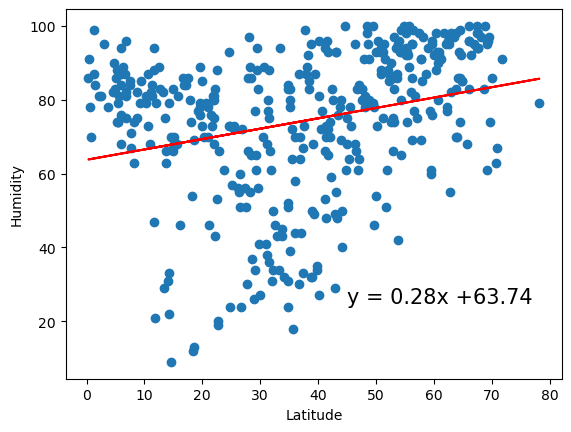

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values, y_values, y_label="Humidity", text_coordinates=(45,25))
plt.show()

The r-value is: 0.017


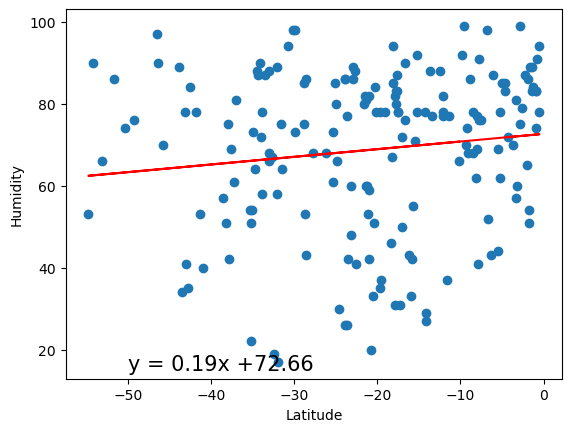

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression(x_values, y_values, y_label="Humidity", text_coordinates=(-50,15))
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a positive correlation between latitude and humidity, where an increase in latitude leads to an increase in humidity. Conversely, in the Southern Hemisphere, humidity has a negative relationship with latitude and is generally low.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.043


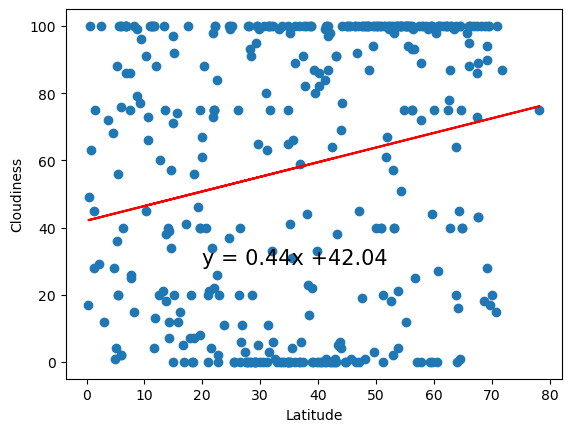

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, y_label="Cloudiness",text_coordinates=(20,29))
plt.show()

The r-value is: 0.008


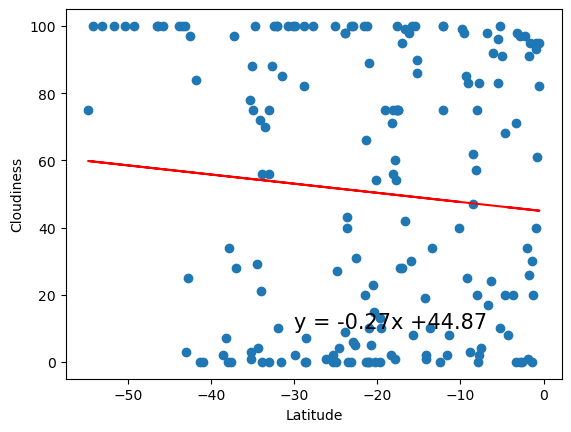

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, y_label="Cloudiness",text_coordinates=(-30,10))
plt.show()

**Discussion about the linear relationship:** There is a direct correlation between cloudiness and latitude in both the Northern and Southern Hemispheres. However, the extent of variation is more pronounced in the Northern Hemisphere and relatively minimal in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004


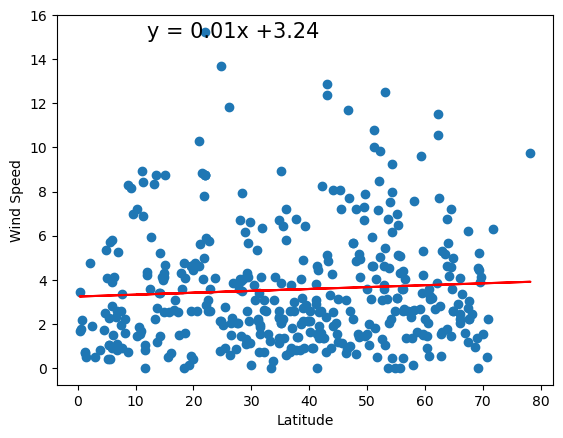

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, y_label= "Wind Speed",text_coordinates=(12,15))
plt.show()

The r-value is: 0.061


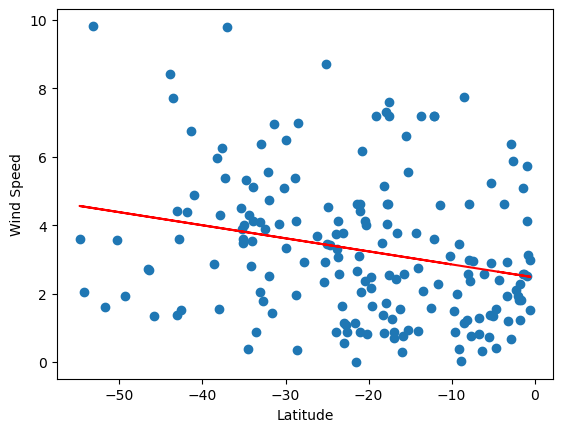

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, y_label= "Wind Speed",text_coordinates=(-50,20))
plt.show()

**Discussion about the linear relationship:** 
There is a minimal correlation between wind speed and latitude in the Northern Hemisphere, whereas a more pronounced correlation exists in the Southern Hemisphere. In the Northern Hemisphere, the majority of cities experience wind speeds between 0 and 9, while in the Southern Hemisphere, wind speed gradually increases and typically ranges between 0 and 8.5.